In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

PREGUNTA 4

a)

In [2]:
ds_data = pd.read_csv(os.path.join("Data","AFP_returns.csv"))

In [3]:
ds_data.head()

,Date,Capital.A,Capital.B,Capital.C,Capital.D,Capital.E,Cuprum.A,Cuprum.B,Cuprum.C,Cuprum.D,...,ProVida.A,ProVida.B,ProVida.C,ProVida.D,ProVida.E,system.A,system.B,system.C,system.D,system.E
0,2005-08,NaN,NaN,NaN,NaN,NaN,-0.62,-0.56,-0.31,0.05,...,-0.60,-0.39,-0.26,0.14,0.77,-0.67,-0.47,-0.31,0.07,0.75
1,2005-09,NaN,NaN,NaN,NaN,NaN,3.03,2.10,1.32,0.60,...,3.44,2.14,1.23,0.39,-0.55,3.21,2.17,1.22,0.49,-0.51
2,2005-10,NaN,NaN,NaN,NaN,NaN,-4.17,-3.58,-3.09,-3.00,...,-4.49,-3.91,-3.38,-2.92,-2.75,-4.28,-3.72,-3.21,-2.85,-2.81
3,2005-11,NaN,NaN,NaN,NaN,NaN,2.11,0.80,-0.14,-0.68,...,2.50,0.77,-0.24,-0.53,-0.79,2.23,0.84,-0.22,-0.54,-0.87
4,2005-12,NaN,NaN,NaN,NaN,NaN,1.64,0.91,0.61,0.51,...,1.85,0.83,0.63,0.39,0.74,1.65,0.89,0.61,0.49,0.81


In [4]:
fondo = "B"
t = np.arange(177)

/Users/IkeMercado/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


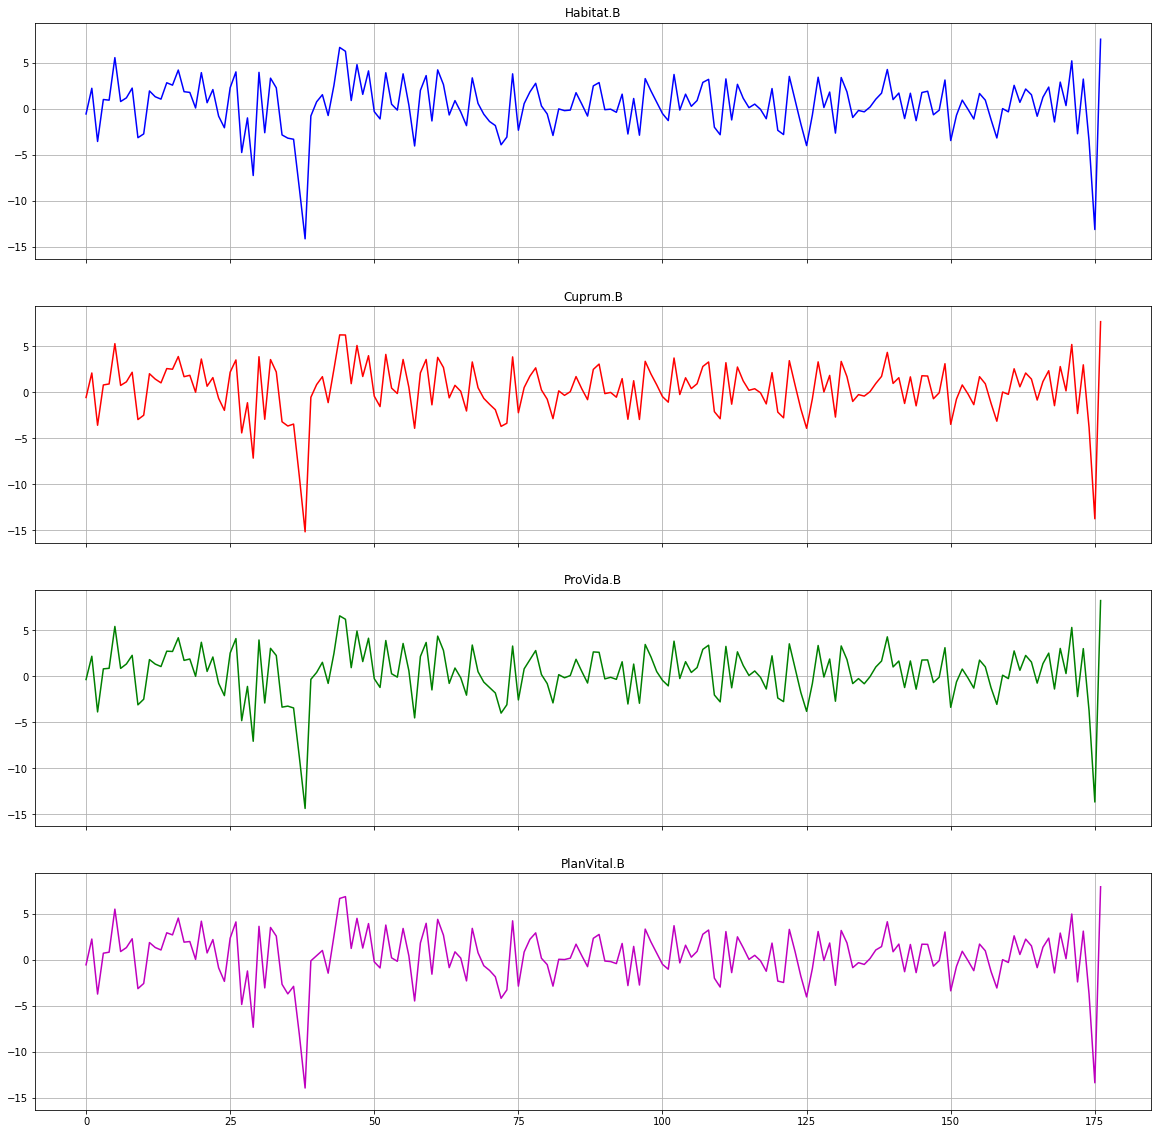

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(20, 20), sharex=True, sharey=True)

ax1.plot(t, ds_data["Habitat."+fondo], "b")
ax1.grid()
ax1.set_title("Habitat."+fondo)

ax2.plot(t, ds_data["Cuprum."+fondo], "r")
ax2.grid()
ax2.set_title("Cuprum."+fondo)

ax3.plot(t, ds_data["ProVida."+fondo], "g")
ax3.grid()
ax3.set_title("ProVida."+fondo)

ax4.plot(t, ds_data["PlanVital."+fondo], "m")
ax4.grid()
ax4.set_title("PlanVital."+fondo)

fig.show()

b) 

In [6]:
ds_data[["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]].head()

,Habitat.B,Cuprum.B,ProVida.B,PlanVital.B
0,-0.57,-0.56,-0.39,-0.57
1,2.22,2.10,2.14,2.23
2,-3.56,-3.58,-3.91,-3.75
3,1.00,0.80,0.77,0.69
4,0.93,0.91,0.83,0.80


In [7]:
from statsmodels.tsa.api import VAR

In [8]:
auxi = VAR(ds_data[["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]])

In [9]:
M = 5
auxi.select_order(M).summary()

,AIC,BIC,FPE,HQIC
0,-8.211,-8.138*,0.0002716,-8.182*
1,-8.299*,-7.933,0.0002489*,-8.150
2,-8.220,-7.562,0.0002692,-7.953
3,-8.171,-7.219,0.0002831,-7.785
4,-8.131,-6.887,0.0002950,-7.626
5,-8.094,-6.557,0.0003069,-7.470


In [10]:
M = 10
auxi.select_order(M).summary()

,AIC,BIC,FPE,HQIC
0,-8.165,-8.090*,0.0002846,-8.134*
1,-8.249*,-7.876,0.0002614*,-8.098
2,-8.163,-7.491,0.0002851,-7.890
3,-8.103,-7.133,0.0003029,-7.709
4,-8.058,-6.788,0.0003175,-7.542
5,-8.015,-6.446,0.0003324,-7.378
6,-8.015,-6.148,0.0003335,-7.257
7,-8.050,-5.884,0.0003236,-7.171
8,-8.137,-5.673,0.0002986,-7.137
9,-8.085,-5.321,0.0003176,-6.963


In [11]:
M = 15
auxi.select_order(M).summary()

,AIC,BIC,FPE,HQIC
0,-8.116,-8.040*,0.0002988,-8.085*
1,-8.208*,-7.826,0.0002726*,-8.053
2,-8.122,-7.436,0.0002972,-7.843
3,-8.069,-7.077,0.0003137,-7.666
4,-8.018,-6.722,0.0003306,-7.492
5,-7.975,-6.374,0.0003460,-7.325
6,-7.964,-6.058,0.0003511,-7.190
7,-8.016,-5.805,0.0003353,-7.119
8,-8.076,-5.560,0.0003182,-7.054
9,-8.038,-5.218,0.0003336,-6.893


In [12]:
M = 20
auxi.select_order(M).summary()

,AIC,BIC,FPE,HQIC
0,-8.069,-7.991*,0.0003132,-8.037*
1,-8.157*,-7.767,0.0002869*,-7.998
2,-8.069,-7.368,0.0003134,-7.784
3,-8.022,-7.010,0.0003286,-7.611
4,-7.975,-6.651,0.0003451,-7.438
5,-7.930,-6.295,0.0003620,-7.266
6,-7.923,-5.976,0.0003663,-7.132
7,-7.972,-5.714,0.0003508,-7.055
8,-8.031,-5.462,0.0003335,-6.988
9,-7.986,-5.105,0.0003525,-6.816


Como en el fondo B, para casi todos los $M$ tanto el criterio FPE como AKAIKE sugieren un orden $p=1$, se considerara dicho orden.

c)

In [25]:
p = 1
auxi.fit(p).summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Oct, 2020
Time:                     22:52:57
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.98358
Nobs:                     176.000    HQIC:                  -8.19773
Log likelihood:          -244.673    FPE:                0.000237867
AIC:                     -8.34386    Det(Omega_mle):     0.000212653
--------------------------------------------------------------------
Results for equation Habitat.B
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.396570         0.233681            1.697           0.090
L1.Habitat.B          -0.230667         1.694372           -0.136           0.892
L1.Cuprum.B            0.909687         1.318490    

In [33]:
A = auxi.fit(1).coefs[0]
(pd.DataFrame(
    A,
    columns=["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]
))


,Habitat.B,Cuprum.B,ProVida.B,PlanVital.B
0,-0.230667,0.909687,1.646590,-2.266347
1,-0.197128,0.870417,1.764412,-2.373833
2,-0.135787,0.827491,1.699791,-2.342131
3,-0.043806,0.463488,1.813182,-2.178453


d)

In [23]:
auxi.fit(1).coefs[0] #CAMBIAR MATRIZ A AL CONSIDERAR p>1 OJO
A = auxi.fit(1).coefs[0]
np.roots(np.poly(A))

array([ 0.31955263+0.j        , -0.06771031+0.15350888j,
       -0.06771031-0.15350888j, -0.02304393+0.j        ])

Todas las raices estan en el disco unitario por lo que el proceso no es estable.

e)

In [15]:
results = auxi.fit(p)
test_data = ds_data[["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]].values


In [16]:
test_data[-8:]

array([[  2.89,   2.8 ,   2.99,   2.88],
       [  0.34,   0.16,   0.26,   0.09],
       [  5.2 ,   5.2 ,   5.27,   4.95],
       [ -2.72,  -2.3 ,  -2.24,  -2.43],
       [  3.22,   2.99,   2.97,   3.09],
       [ -3.52,  -3.83,  -3.79,  -3.78],
       [-13.13, -13.74, -13.7 , -13.39],
       [  7.55,   7.68,   8.19,   7.91]])

In [17]:
test_data = ds_data[["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]].values[-4:]
train_data = ds_data[["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]].values[:-4]
train_datafr = ds_data[["Habitat."+fondo,"Cuprum."+fondo,"ProVida."+fondo,"PlanVital."+fondo]][:-4]
train_model = VAR(train_datafr)
train_model.fit(p).forecast(train_data,4)

array([[0.32526113, 0.28585277, 0.29228538, 0.20657908],
       [0.63929298, 0.6157248 , 0.60250777, 0.6008998 ],
       [0.48371448, 0.45150787, 0.43688525, 0.4431754 ],
       [0.44669124, 0.41290141, 0.40069471, 0.40873504]])

In [18]:
forec_data = train_model.fit(p).forecast(train_data,4)
forec_data

array([[0.32526113, 0.28585277, 0.29228538, 0.20657908],
       [0.63929298, 0.6157248 , 0.60250777, 0.6008998 ],
       [0.48371448, 0.45150787, 0.43688525, 0.4431754 ],
       [0.44669124, 0.41290141, 0.40069471, 0.40873504]])

In [19]:
test_data

array([[  3.22,   2.99,   2.97,   3.09],
       [ -3.52,  -3.83,  -3.79,  -3.78],
       [-13.13, -13.74, -13.7 , -13.39],
       [  7.55,   7.68,   8.19,   7.91]])

In [20]:
SUM = (forec_data-test_data)**2
SUM

array([[  8.37951311,   7.31241227,   7.17015557,   8.31411622],
       [ 17.29971809,  19.764469  ,  19.29412451,  19.19228303],
       [185.33322191, 201.39889551, 199.85152466, 191.35674175],
       [ 50.45699533,  52.8107219 ,  60.67327688,  56.268976  ]])

In [21]:
sum(SUM[:,0])/4

65.36736210888525

In [22]:
SCM = list()
for i in range(4):
    SCM.append(sum(SUM[:,i])/4)
SCM
        

[65.36736210888525, 70.3216246675097, 71.74727040702676, 68.78302925036122]

El AFP que predice mejor es el AFP Habitat ya que tiene menor error cuadratico medio